# Input parameter for the DTDs.

Check different input for the SNIa DTD.

$\odot$ Power law & Maoz

$\odot$ Gaussian

$\odot$ Exponential



In [2]:
%pylab nbagg
import sygma as s
reload(s)
s.__file__
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Power law & Maoz

default beta_pow = -1  # t^beta_pow

In [60]:
s1=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,sn1a_rate='power_law',beta_pow=-1,
           imf_type='salpeter',imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',
           sn1a_on=True, sn1a_table='yield_tables/sn1a_h1.txt', 
           iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
s2=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,sn1a_rate='power_law',beta_pow=-2,
           imf_type='salpeter',imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',
           sn1a_on=True, sn1a_table='yield_tables/sn1a_h1.txt', 
           iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
s3_maoz=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,sn1a_rate='maoz',
            imf_type='salpeter',imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',
            sn1a_on=True, sn1a_table='yield_tables/sn1a_h1.txt', 
            iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')

SYGMA run in progress..
   SYGMA run completed - Run time: 2.11s
SYGMA run in progress..
   SYGMA run completed - Run time: 2.31s
SYGMA run in progress..
   SYGMA run completed - Run time: 2.06s


Maoz and power law with -1 is the same as visible below.

<IPython.core.display.Javascript object>


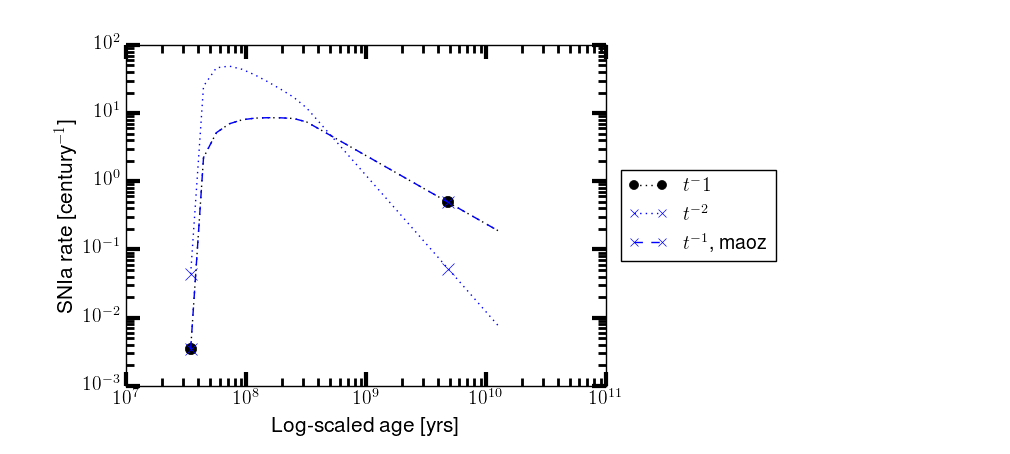

In [61]:
s1.plot_sn_distr(fig=5,rate=True,rate_only='sn1a',label1='$t{^-1}$',marker1='o')
s2.plot_sn_distr(fig=5,rate=True,rate_only='sn1a',label1='$t^{-2}$',marker1='x',color1='b')
s3_maoz.plot_sn_distr(fig=5,rate=True,rate_only='sn1a',label1='$t^{-1}$, maoz',marker1='x',color1='b',shape1='--')


# Gaussian 

### gauss_dtd=[3.3e9,6.6e8] (as used in Wiersma09)

In [90]:
gauss_dtd=[1e9,6.6e8]

In [91]:
reload(s)
s2=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,sn1a_rate='gauss',gauss_dtd=gauss_dtd,imf_type='salpeter',imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=True, sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
Yield_tot_sim=s2.history.ism_iso_yield_1a[-1][0]
zm_lifetime_grid=s2.zm_lifetime_grid_current
idx_z = (np.abs(zm_lifetime_grid[0]-0.0001)).argmin() #Z=0
grid_masses=zm_lifetime_grid[1][::-1]
grid_lifetimes=zm_lifetime_grid[2][idx_z][::-1]
spline_degree1=2
smoothing1=0
boundary=[None,None]
spline = UnivariateSpline(grid_lifetimes,np.log10(grid_masses),bbox=boundary,k=spline_degree1,s=smoothing1)
g_dt1=s2

SYGMA run in progress..
   SYGMA run completed - Run time: 2.42s


In [92]:
from scipy.integrate import dblquad
def spline1(x):
    #x=t
    return max(3.,10**spline(np.log10(x)))
def f_wd_dtd(m,t):
        #print 'time ',t
        #print 'mass ',m
        mlim=10**spline(np.log10(t))
        #print 'mlim',mlim
        if mlim>8.:
                #print t
                #print mlim
                return 0
        else:
                #mmin=max(3.,massfunc(t))
                #mmax=8.
                #imf=self.__imf(mmin,mmax,1)
                #Delay time distribution function (DTD)
                [1e9,6.6e8]
                tau=  gauss_dtd[0] #1e9 #3.3e9 #characteristic delay time
                sigma=gauss_dtd[1]  #0.66e9#0.25*tau 
                #sigma=0.2#narrow distribution
                #sigma=0.5*tau #wide distribution
                mmin=0
                mmax=0
                inte=0
                def g2(mm):
                    return mm*mm**-2.35
                norm=1./quad(g2,1,30)[0]
                #imf normalized to 1Msun
                return  norm*m**-2.35* 1./np.sqrt(2*np.pi*sigma**2) * np.exp(-(t-tau)**2/(2*sigma**2))
                
#a= 0.0069 #normalization parameter
#if spline(np.log10(t))
a=1e-3/(dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0] )
n1a= a* dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]            
Yield_tot=n1a*1e11*0.1 #special factor

In [93]:
print Yield_tot_sim
print Yield_tot
print 'Should be 1: ', Yield_tot_sim/Yield_tot

10000000.0598
10000000.0
Should be 1:  1.00000000598


<IPython.core.display.Javascript object>


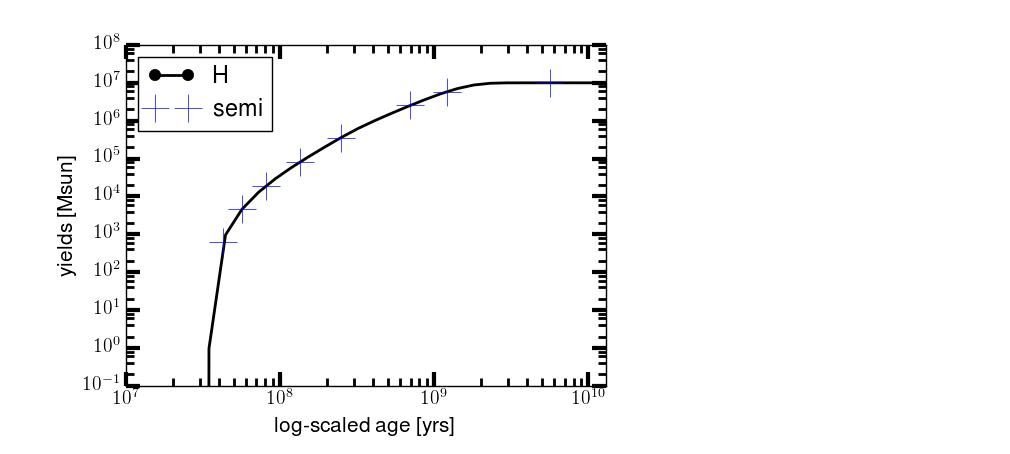

In [94]:
s2.plot_mass(fig=6,specie='H',source='sn1a',label='H',color='k',shape='-',marker='o',markevery=800)
yields1=[]
ages1=[]
m=[1,1.65,2,3,4,5,6,7,12,15,20,25]
ages=[5.67e9,1.211e9,6.972e8,2.471e8,1.347e8,8.123e7,5.642e7,4.217e7,1.892e7,1.381e7,9.895e6,7.902e6]
for m1 in m:
    t=ages[m.index(m1)]
    yields= a* dblquad(f_wd_dtd,0,t,lambda x: spline1(x), lambda x: 8)[0] *1e11*0.1 #special factor
    yields1.append(yields)
    ages1.append(t)
plt.plot(ages1,yields1,marker='+',linestyle='',markersize=20,label='semi')
plt.legend(loc=2)
plt.show()

### gauss_dtd=[4e9,3.2e9] (as mentioned in Wiersma09)

In [95]:
gauss_dtd=[4e9,2e9]

In [96]:
s2=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,sn1a_rate='gauss',gauss_dtd=gauss_dtd,imf_type='salpeter',imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=True, sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
Yield_tot_sim=s2.history.ism_iso_yield_1a[-1][0]
zm_lifetime_grid=s2.zm_lifetime_grid_current
idx_z = (np.abs(zm_lifetime_grid[0]-0.0001)).argmin() #Z=0
grid_masses=zm_lifetime_grid[1][::-1]
grid_lifetimes=zm_lifetime_grid[2][idx_z][::-1]
spline_degree1=2
smoothing1=0
boundary=[None,None]
spline = UnivariateSpline(grid_lifetimes,np.log10(grid_masses),bbox=boundary,k=spline_degree1,s=smoothing1)
g_dt2=s2

SYGMA run in progress..
   SYGMA run completed - Run time: 2.31s


In [97]:
from scipy.integrate import dblquad
def spline1(x):
    #x=t
    return max(3.,10**spline(np.log10(x)))
def f_wd_dtd(m,t):
        #print 'time ',t
        #print 'mass ',m
        mlim=10**spline(np.log10(t))
        #print 'mlim',mlim
        if mlim>8.:
                #print t
                #print mlim
                return 0
        else:
                #mmin=max(3.,massfunc(t))
                #mmax=8.
                #imf=self.__imf(mmin,mmax,1)
                #Delay time distribution function (DTD)
                [1e9,6.6e8]
                tau=  gauss_dtd[0] #1e9 #3.3e9 #characteristic delay time
                sigma=gauss_dtd[1]  #0.66e9#0.25*tau 
                #sigma=0.2#narrow distribution
                #sigma=0.5*tau #wide distribution
                mmin=0
                mmax=0
                inte=0
                def g2(mm):
                    return mm*mm**-2.35
                norm=1./quad(g2,1,30)[0]
                #imf normalized to 1Msun
                return  norm*m**-2.35* 1./np.sqrt(2*np.pi*sigma**2) * np.exp(-(t-tau)**2/(2*sigma**2))
                
#a= 0.0069 #normalization parameter
#if spline(np.log10(t))
a=1e-3/(dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0] )
n1a= a* dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]            
Yield_tot=n1a*1e11*0.1 #special factor

In [98]:
print Yield_tot_sim
print Yield_tot
print 'Should be 1: ', Yield_tot_sim/Yield_tot

9999999.87856
10000000.0
Should be 1:  0.999999987856


<IPython.core.display.Javascript object>


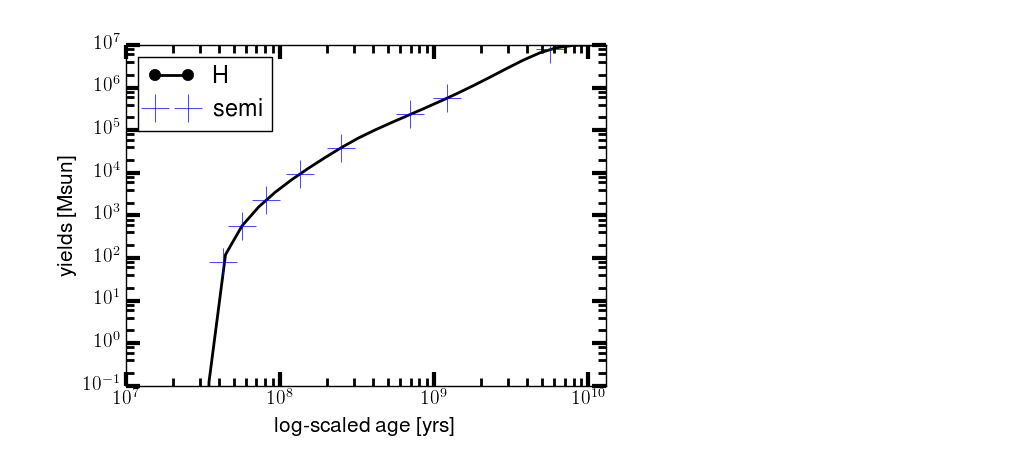

In [99]:
s2.plot_mass(fig=7,specie='H',source='sn1a',label='H',color='k',shape='-',marker='o',markevery=800)
yields1=[]
ages1=[]
m=[1,1.65,2,3,4,5,6,7,12,15,20,25]
ages=[5.67e9,1.211e9,6.972e8,2.471e8,1.347e8,8.123e7,5.642e7,4.217e7,1.892e7,1.381e7,9.895e6,7.902e6]
for m1 in m:
    t=ages[m.index(m1)]
    yields= a* dblquad(f_wd_dtd,0,t,lambda x: spline1(x), lambda x: 8)[0] *1e11*0.1 #special factor
    yields1.append(yields)
    ages1.append(t)
plt.plot(ages1,yields1,marker='+',linestyle='',markersize=20,label='semi')
plt.legend(loc=2)
plt.show()

Difference in rate

<IPython.core.display.Javascript object>


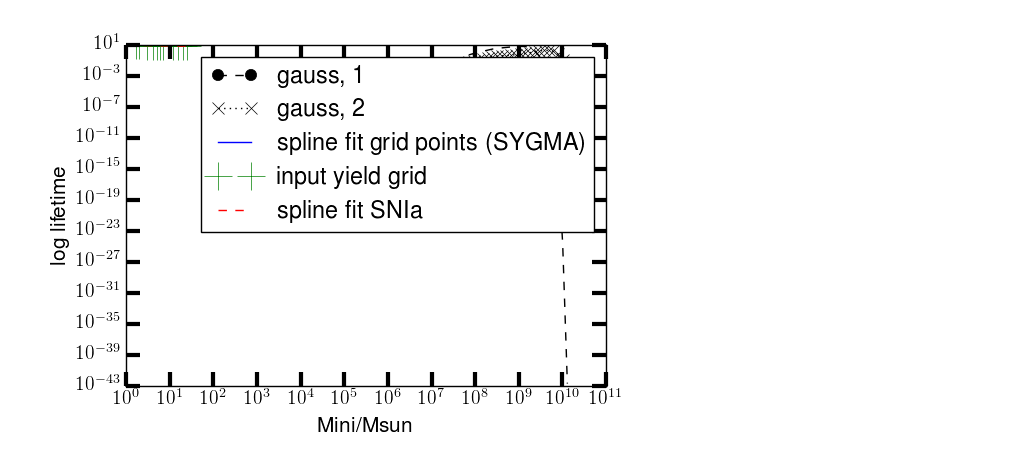

In [100]:
g_dt1.plot_sn_distr(fig=66,rate=True,rate_only='sn1a',label1='gauss, 1',marker1='o',shape1='--')
g_dt2.plot_sn_distr(fig=66,rate=True,rate_only='sn1a',label1='gauss, 2',marker1='x',markevery=1)


In [101]:
print g_dt1.gauss_dtd
print g_dt2.gauss_dtd

[1000000000.0, 660000000.0]
[4000000000.0, 2000000000.0]


# Exponential

### exp_dtd (as used in Wiersma09) 2e9

In [102]:
exp_dtd=2e9

In [103]:
#import read_yields as ry
import sygma as s
reload(s)
#interpolate_lifetimes_grid=s22.__interpolate_lifetimes_grid
#ytables=ry.read_nugrid_yields('yield_tables/isotope_yield_table_h1.txt')
#zm_lifetime_grid=interpolate_lifetimes_grid(ytables,iolevel=0) 1e7
s1=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,sn1a_on=True,sn1a_rate='exp',exp_dtd=exp_dtd,imf_type='salpeter',imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt', sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
Yield_tot_sim=s1.history.ism_iso_yield_1a[-1][0]
zm_lifetime_grid=s1.zm_lifetime_grid_current
idx_z = (np.abs(zm_lifetime_grid[0]-0.0001)).argmin() #Z=0
grid_masses=zm_lifetime_grid[1][::-1]
grid_lifetimes=zm_lifetime_grid[2][idx_z][::-1]
spline_degree1=2
smoothing1=0
boundary=[None,None]
spline_lifetime = UnivariateSpline(grid_lifetimes,np.log10(grid_masses),bbox=boundary,k=spline_degree1,s=smoothing1)
plt.plot(grid_masses,grid_lifetimes,label='spline fit grid points (SYGMA)')
plt.xlabel('Mini/Msun')
plt.ylabel('log lifetime')
m=[1,1.65,2,3,4,5,6,7,12,15,20,25]
ages=[5.67e9,1.211e9,6.972e8,2.471e8,1.347e8,8.123e7,5.642e7,4.217e7,1.892e7,1.381e7,9.895e6,7.902e6]
plt.plot(np.array(m),np.log10(np.array(ages)),marker='+',markersize=20,label='input yield grid',linestyle='None')
plt.plot(10**spline_lifetime(np.log10(ages)),np.log10(ages),linestyle='--',label='spline fit SNIa')
plt.legend()
#plt.yscale('log')
e_dt1=s1

SYGMA run in progress..
   SYGMA run completed - Run time: 2.33s


In [104]:
#following inside function wiersma09_efolding

#if timemin ==0:
#    timemin=1

from scipy.integrate import dblquad
def spline1(x):
    #x=t
    minm_prog1a=3
    #if minimum progenitor mass is larger than 3Msun due to IMF range:
    #if self.imf_bdys[0]>3:
    #    minm_prog1a=self.imf_bdys[0]
    return max(minm_prog1a,10**spline_lifetime(np.log10(x)))


def f_wd_dtd(m,t):
                #print 'time ',t
                #print 'mass ',m
                mlim=10**spline_lifetime(np.log10(t))
                maxm_prog1a=8
                #if maximum progenitor mass is smaller than 8Msun due to IMF range:
                #if 8>self.imf_bdys[1]:
                #        maxm_prog1a=self.imf_bdys[1]
                if mlim>maxm_prog1a:
                        return 0
                else:
                        #Delay time distribution function (DTD)
                        tau=  2e9
                        mmin=0
                        mmax=0
                        inte=0
                #follwing is done in __imf()
                def g2(mm):
                    return mm*mm**-2.35
                norm=1./quad(g2,1,30)[0]
                #print 'IMF test',norm*m**-2.35
                #imf normalized to 1Msun
                return  norm*m**-2.35* np.exp(-t/tau)/tau
                
a= 0.01 #normalization parameter
#if spline(np.log10(t))
#a=1e-3/()
a=1e-3/(dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]   )
n1a= a* dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]   
# in principle since normalization is set: nb_1a_per_m the above calculation is not necessary anymore
Yield_tot=n1a*1e11*0.1 *1 #7 #special factor

In [105]:
print Yield_tot_sim
print Yield_tot
print 'Should be : ', Yield_tot_sim/Yield_tot

10000000.0718
10000000.0
Should be :  1.00000000718


<IPython.core.display.Javascript object>


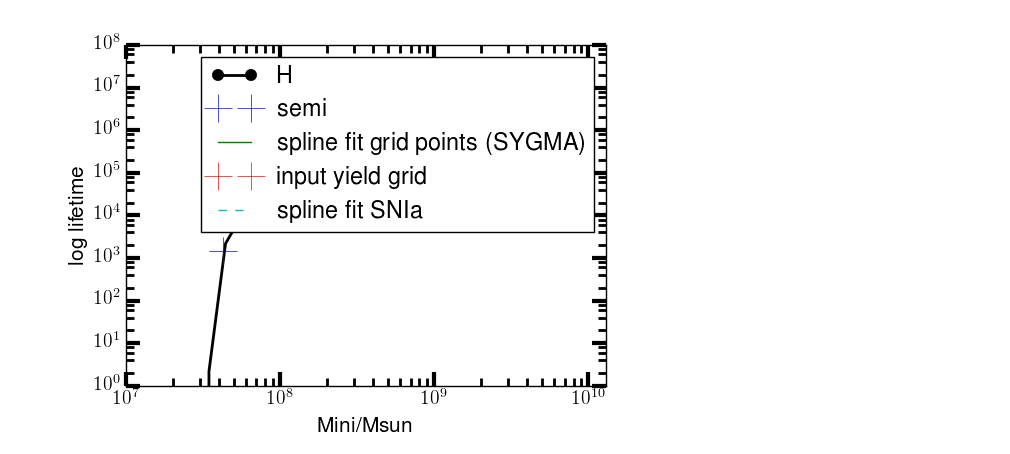

In [106]:
s1.plot_mass(fig=8,specie='H',source='sn1a',label='H',color='k',shape='-',marker='o',markevery=800)
yields1=[]
ages1=[]
a= 0.01 #normalization parameter
a=1e-3/(dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]   )
for m1 in m:
    t=ages[m.index(m1)]
    yields= a* dblquad(f_wd_dtd,0,t,lambda x: spline1(x), lambda x: 8)[0] *1e11*0.1 #special factor 
    yields1.append(yields)
    ages1.append(t)
plt.plot(ages1,yields1,marker='+',linestyle='',markersize=20,label='semi')
plt.legend(loc=4)

### exp_dtd (as used in Wiersma09) 10e9

In [107]:
exp_dtd=10e9

In [108]:
#import read_yields as ry
import sygma as s
reload(s)
#interpolate_lifetimes_grid=s22.__interpolate_lifetimes_grid
#ytables=ry.read_nugrid_yields('yield_tables/isotope_yield_table_h1.txt')
#zm_lifetime_grid=interpolate_lifetimes_grid(ytables,iolevel=0) 1e7
s1=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,sn1a_on=True,sn1a_rate='exp',exp_dtd=exp_dtd,imf_type='salpeter',imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt', sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
Yield_tot_sim=s1.history.ism_iso_yield_1a[-1][0]
zm_lifetime_grid=s1.zm_lifetime_grid_current
idx_z = (np.abs(zm_lifetime_grid[0]-0.0001)).argmin() #Z=0
grid_masses=zm_lifetime_grid[1][::-1]
grid_lifetimes=zm_lifetime_grid[2][idx_z][::-1]
spline_degree1=2
smoothing1=0
boundary=[None,None]
spline_lifetime = UnivariateSpline(grid_lifetimes,np.log10(grid_masses),bbox=boundary,k=spline_degree1,s=smoothing1)
plt.plot(grid_masses,grid_lifetimes,label='spline fit grid points (SYGMA)')
plt.xlabel('Mini/Msun')
plt.ylabel('log lifetime')
m=[1,1.65,2,3,4,5,6,7,12,15,20,25]
ages=[5.67e9,1.211e9,6.972e8,2.471e8,1.347e8,8.123e7,5.642e7,4.217e7,1.892e7,1.381e7,9.895e6,7.902e6]
plt.plot(np.array(m),np.log10(np.array(ages)),marker='+',markersize=20,label='input yield grid',linestyle='None')
plt.plot(10**spline_lifetime(np.log10(ages)),np.log10(ages),linestyle='--',label='spline fit SNIa')
plt.legend()
#plt.yscale('log')
e_dt2=s1

SYGMA run in progress..
   SYGMA run completed - Run time: 2.32s


In [109]:
#following inside function wiersma09_efolding

#if timemin ==0:
#    timemin=1

from scipy.integrate import dblquad
def spline1(x):
    #x=t
    minm_prog1a=3
    #if minimum progenitor mass is larger than 3Msun due to IMF range:
    #if self.imf_bdys[0]>3:
    #    minm_prog1a=self.imf_bdys[0]
    return max(minm_prog1a,10**spline_lifetime(np.log10(x)))


def f_wd_dtd(m,t):
                #print 'time ',t
                #print 'mass ',m
                mlim=10**spline_lifetime(np.log10(t))
                maxm_prog1a=8
                #if maximum progenitor mass is smaller than 8Msun due to IMF range:
                #if 8>self.imf_bdys[1]:
                #        maxm_prog1a=self.imf_bdys[1]
                if mlim>maxm_prog1a:
                        return 0
                else:
                        #Delay time distribution function (DTD)
                        tau=  exp_dtd
                        mmin=0
                        mmax=0
                        inte=0
                #follwing is done in __imf()
                def g2(mm):
                    return mm*mm**-2.35
                norm=1./quad(g2,1,30)[0]
                #print 'IMF test',norm*m**-2.35
                #imf normalized to 1Msun
                return  norm*m**-2.35* np.exp(-t/tau)/tau
                
a= 0.01 #normalization parameter
#if spline(np.log10(t))
#a=1e-3/()
a=1e-3/(dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]   )
n1a= a* dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]   
# in principle since normalization is set: nb_1a_per_m the above calculation is not necessary anymore
Yield_tot=n1a*1e11*0.1 *1 #7 #special factor


In [110]:
print Yield_tot_sim
print Yield_tot
print 'Should be : ', Yield_tot_sim/Yield_tot


9999999.48588
10000000.0
Should be :  0.999999948588


<IPython.core.display.Javascript object>


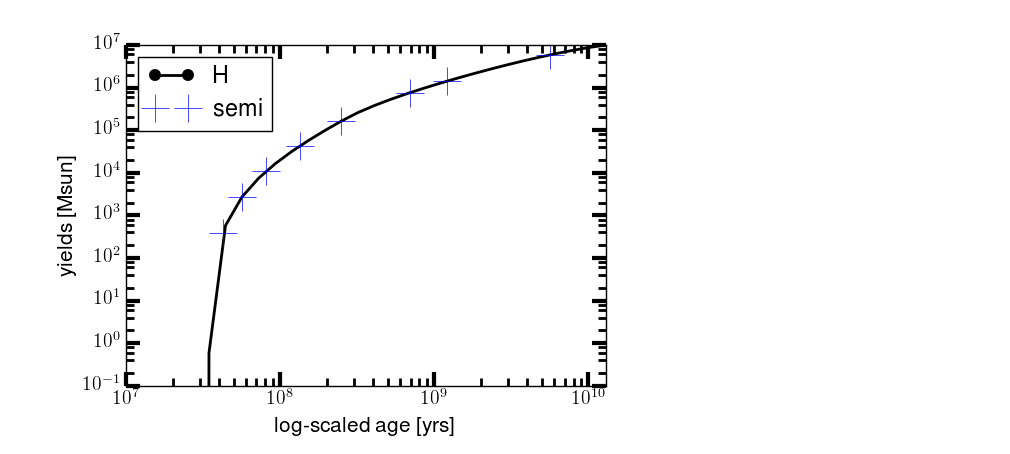

In [114]:
s1.plot_mass(fig=9,specie='H',source='sn1a',label='H',color='k',shape='-',marker='o',markevery=800)
yields1=[]
ages1=[]
a= 0.01 #normalization parameter
a=1e-3/(dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]   )
for m1 in m:
    t=ages[m.index(m1)]
    yields= a* dblquad(f_wd_dtd,0,t,lambda x: spline1(x), lambda x: 8)[0] *1e11*0.1 #special factor 
    yields1.append(yields)
    ages1.append(t)
plt.plot(ages1,yields1,marker='+',linestyle='',markersize=20,label='semi')
plt.legend(loc=2)

<IPython.core.display.Javascript object>


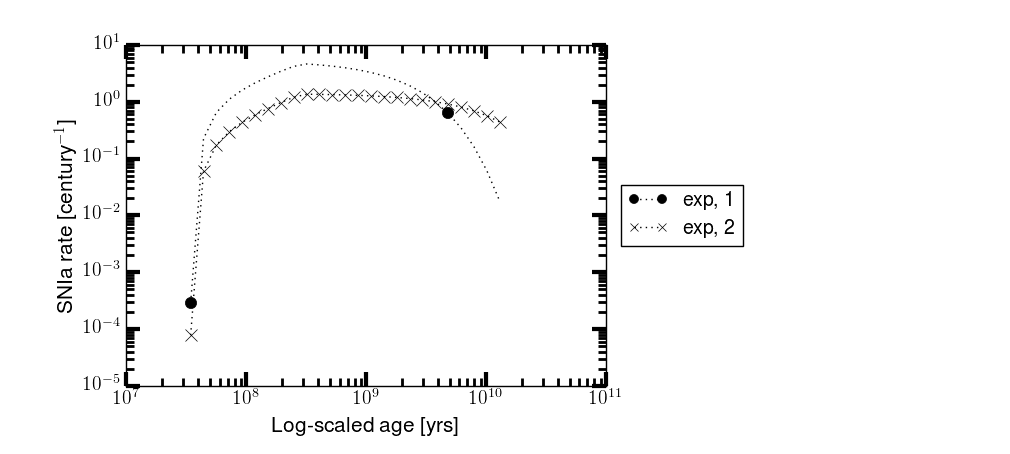

In [115]:
e_dt1.plot_sn_distr(fig=77,rate=True,rate_only='sn1a',label1='exp, 1',marker1='o')
e_dt2.plot_sn_distr(fig=77,rate=True,rate_only='sn1a',label1='exp, 2',marker1='x',markevery=1)

In [83]:
print e_dt1.exp_dtd,
print e_dt2.exp_dtd


10000000000.0 10000000000.0
